<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Zadanie" data-toc-modified-id="Zadanie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Zadanie</a></span><ul class="toc-item"><li><span><a href="#Na-początku-wczytaj-dane-data/height.csv" data-toc-modified-id="Na-początku-wczytaj-dane-data/height.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Na początku wczytaj dane <i>data/height.csv</i></a></span></li><li><span><a href="#Narysuj-wykres-wysokości-w-czasie" data-toc-modified-id="Narysuj-wykres-wysokości-w-czasie-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Narysuj wykres wysokości w czasie</a></span></li><li><span><a href="#Z-pierwszego-i-ostatniego-punktu-wyznacz-równanie-prostej-na-podstawie-poniższych-wzorów" data-toc-modified-id="Z-pierwszego-i-ostatniego-punktu-wyznacz-równanie-prostej-na-podstawie-poniższych-wzorów-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Z pierwszego i ostatniego punktu wyznacz równanie prostej na podstawie poniższych wzorów</a></span></li></ul></li><li><span><a href="#Składamy-regresję-liniową." data-toc-modified-id="Składamy-regresję-liniową.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Składamy regresję liniową.</a></span><ul class="toc-item"><li><span><a href="#Implementacja-równania-regresji-liniowej-w-następującej-kolejności:" data-toc-modified-id="Implementacja-równania-regresji-liniowej-w-następującej-kolejności:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implementacja równania regresji liniowej w następującej kolejności:</a></span></li><li><span><a href="#Zadanie-Narysuj-wykres-regresji-liniowej" data-toc-modified-id="Zadanie-Narysuj-wykres-regresji-liniowej-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Zadanie Narysuj wykres regresji liniowej</a></span></li><li><span><a href="#Współczynnik-determinacji" data-toc-modified-id="Współczynnik-determinacji-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Współczynnik determinacji</a></span></li><li><span><a href="#Wykres-reszt" data-toc-modified-id="Wykres-reszt-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Wykres reszt</a></span></li></ul></li></ul></div>

# Prosty przykład regresji liniowej

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

## Zadanie
### Na początku wczytaj dane <I>data/height.csv</I>

In [3]:
df = pd.read_csv("data/height.csv")

In [4]:
df.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [5]:
df.shape

(15, 1)

### Narysuj wykres wysokości w czasie

In [6]:
# Naszym 'czasem' jest indeks
# Biblioteki do ML przyjmują dane w postaci NumPy; może dokonać sobie konwersji z DataFrames
heightArr = df['Height'].to_numpy()
heightArr

array([1.47, 1.5 , 1.52, 1.55, 1.57, 1.6 , 1.63, 1.65, 1.68, 1.7 , 1.73,
       1.75, 1.78, 1.8 , 1.83])

In [7]:
len(heightArr)

15

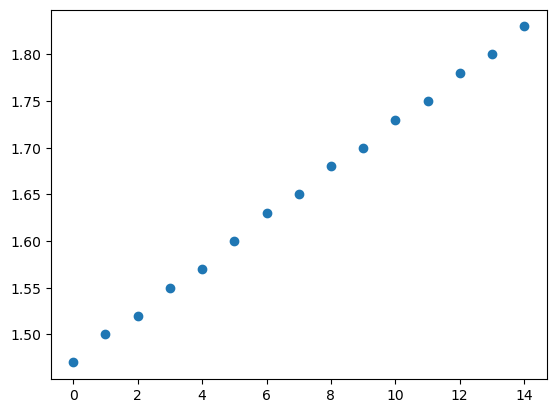

In [9]:
plt.plot(heightArr, linestyle='none', marker = 'o')
pass

### Z pierwszego i ostatniego punktu wyznacz równanie prostej na podstawie poniższych wzorów


$$
a = \frac{y_B-y_A}{x_B-x_A} \\
b = y_A-ax_A\\
\\
\text{A,B - skrajne punkty o współrzędnych (x,y)} \\
\text{a - slope} \\
\text{b - intercept} \\
$$


In [10]:
A = (0, heightArr[0])
A 

(0, 1.47)

In [11]:
# heightArr.size -1

In [12]:
B = (heightArr.size -1, heightArr[heightArr.size -1])
B

(14, 1.83)

In [13]:
print(f'A = {A}, B = {B}')

A = (0, 1.47), B = (14, 1.83)


In [14]:
a = ((B[1] - A[1]) / (B[0] - A[0]))
a

0.02571428571428572

In [15]:
b = A[1] - a*A[0]
b

1.47

In [16]:
print('a = {0:.3f}, b = {1}'.format(a,b))

a = 0.026, b = 1.47


In [17]:
def linear_function(a,b,x):
    """
    nasza funkcja liniowa"""
    return a*x + b

In [18]:
#plt.plot (x, y)
#plt.plot([x ze skrajnego pkt A, x ze skrajnego pkt B], [y ze skrajnego pkt A, y ze skrajnego pkt B])

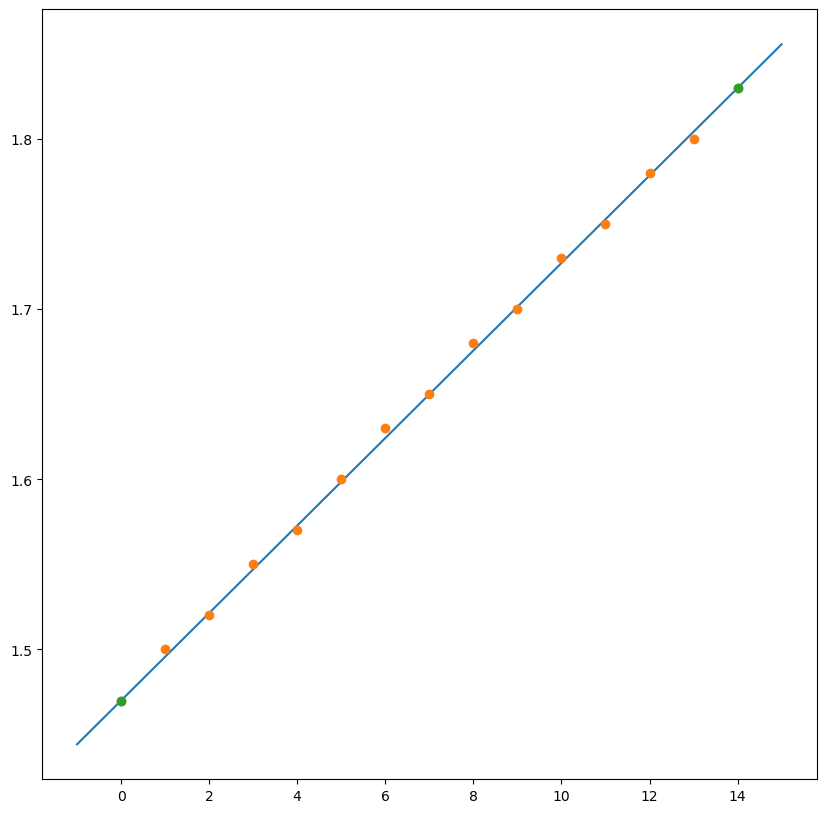

In [19]:
#rysujemy wykres funkcji
fig = plt.figure(figsize = (10,10))
xDraw = np.arange(math.floor(A[0]) -1, math.ceil(B[0]) + 2)
yDraw = linear_function(a,b,xDraw)
plt.plot(xDraw, yDraw)
plt.plot(heightArr, linestyle = 'none', marker = 'o')
plt.plot([A[0], B[0]], [A[1], B[1]], linestyle= 'none', marker = 'o', markersize=6)
plt.show()

## Składamy regresję liniową.
Współczynnik kierunkowy (slope)
$$
a = \frac{\sum_{k=1}^n(x_i-x_{mean})(y_i-y_{mean})}{\sum_{k=1}^n(x_i-x_{mean})^2}\\ 

x_i\text{ - wartość współrzędnej x kolejnych punktów} \\
y_i\text{ - wartość współrzędnej y kolejnych punktów} \\
x_{mean}\text{ - średnia wartość współrzędnej x wszystkich punktów} \\
y_{mean}\text{ - średnia wartość współrzędnej y wszystkich punktów}
$$
\
Współczynnik przesunięcia (intercept)
\begin{equation*}
b = y_{mean}-ax_{mean}
\end{equation*} 

### Implementacja równania regresji liniowej w następującej kolejności:
1. Średnia x
2. Średnia y
3. Wektor różnicy x od średniej x
4. Wektor różnicy y od średniej y
5. Kwadrat pkt. 3
6. Iloczyn pkt.3 i pkt.4
7. Suma pkt. 6
8. Suma pkt. 5
9. Współczynnik slope
10. Współczynnik intercept

In [21]:
y = heightArr
x = np.arange(0, heightArr.size ,1)
print('x.shape', x.shape)
print('y.shape', y.shape)

x.shape (15,)
y.shape (15,)


In [22]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [23]:
y

array([1.47, 1.5 , 1.52, 1.55, 1.57, 1.6 , 1.63, 1.65, 1.68, 1.7 , 1.73,
       1.75, 1.78, 1.8 , 1.83])

In [24]:
x_mean = x.mean()
x_mean

7.0

In [25]:
y_mean = y.mean()
y_mean

1.6506666666666665

In [26]:
x_sub = x - x_mean
x_sub

array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.])

In [27]:
y_sub = y - y_mean
y_sub

array([-0.18066667, -0.15066667, -0.13066667, -0.10066667, -0.08066667,
       -0.05066667, -0.02066667, -0.00066667,  0.02933333,  0.04933333,
        0.07933333,  0.09933333,  0.12933333,  0.14933333,  0.17933333])

In [28]:
x_sub_times_y_sub = x_sub * y_sub
x_sub_times_y_sub

array([ 1.26466667,  0.904     ,  0.65333333,  0.40266667,  0.242     ,
        0.10133333,  0.02066667, -0.        ,  0.02933333,  0.09866667,
        0.238     ,  0.39733333,  0.64666667,  0.896     ,  1.25533333])

In [29]:
#x_sub_sq = x_sub**2
x_sub_sq = np.square(x_sub)
x_sub_sq

array([49., 36., 25., 16.,  9.,  4.,  1.,  0.,  1.,  4.,  9., 16., 25.,
       36., 49.])

In [30]:
xy_sum = x_sub_times_y_sub.sum()
xy_sum

7.15

In [31]:
x_sum = x_sub_sq.sum()
x_sum

280.0

In [32]:
a = xy_sum/x_sum
a

0.025535714285714287

In [33]:
b = y_mean - a * x_mean
b

1.4719166666666665

### Zadanie Narysuj wykres regresji liniowej

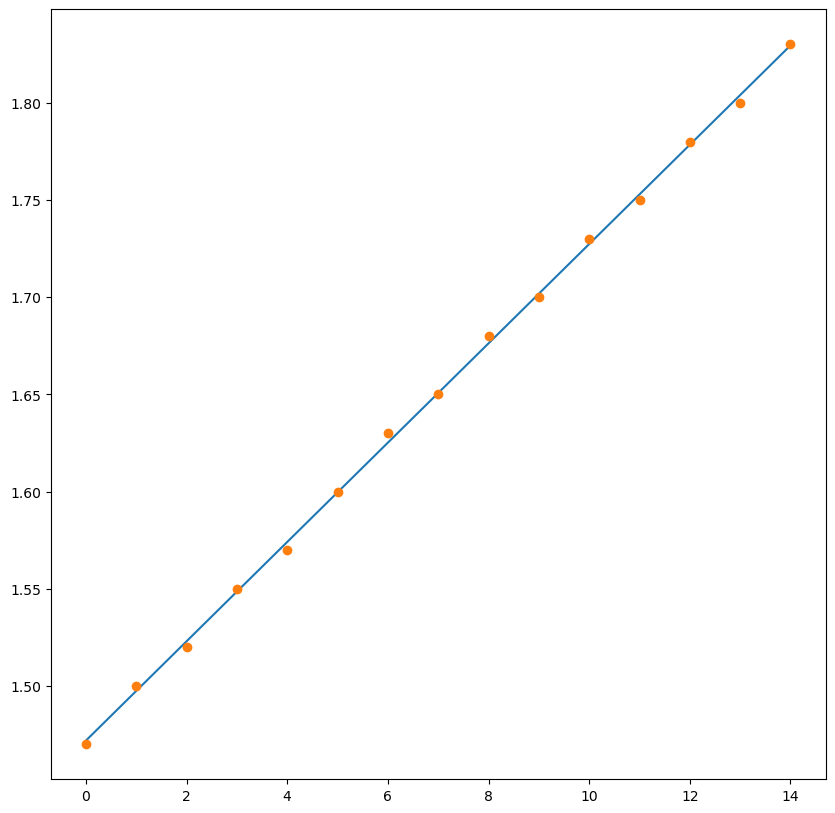

In [36]:
# Rysujemy wykres powyzszej funkcji
fig = plt.figure(figsize = (10,10))
xDraw = x
yDraw = linear_function(a,b,xDraw)
plt.plot(xDraw, yDraw)
plt.plot(heightArr, linestyle = 'none', marker = 'o')
plt.show()

### Współczynnik determinacji

$$
R^2 = \frac{\sum_{k=1}^n(y_{pred}-y_{mean})^2}{\sum_{k=1}^n(y_{ref}-y_{mean})^2} \\

\

y_{pred}\text{ - wartość przewidywana współrzędnej y na podsatwie modelu regresji liniowej} \\
y_{ref}\text{ - wartość referencyjna współrzędnej y} \\
y_{mean}\text{ - wartość średnia współrzędnej y} \\
$$

In [37]:
y_ref = y
y_pred = linear_function(a,b,x)

In [38]:
def r_square(y_pred, y_ref, y_mean):
    up = np.sum(np.square(y_ref - y_mean))    # góra równannia
    down = np.sum(np.square(y_pred - y_mean)) # dół równania
    return up/down

In [39]:
print('R^2 dla modelu regresji liniowej: \n', r_square(y_pred, y_ref, y_mean))

R^2 dla modelu regresji liniowej: 
 1.0006187751642297


In [47]:
#R^2 jest w zakresie 0-1 (0-100% wytłumaczenia wariancji modelu)

In [40]:
#sklearn
from sklearn.metrics import r2_score

In [41]:
r2_score(y_ref, y_pred)

0.9993816074817023

### Wykres reszt

In [42]:
yerr = y_ref - y_pred
yerr

array([-0.00191667,  0.00254762, -0.0029881 ,  0.00147619, -0.00405952,
        0.00040476,  0.00486905, -0.00066667,  0.00379762, -0.0017381 ,
        0.00272619, -0.00280952,  0.00165476, -0.00388095,  0.00058333])

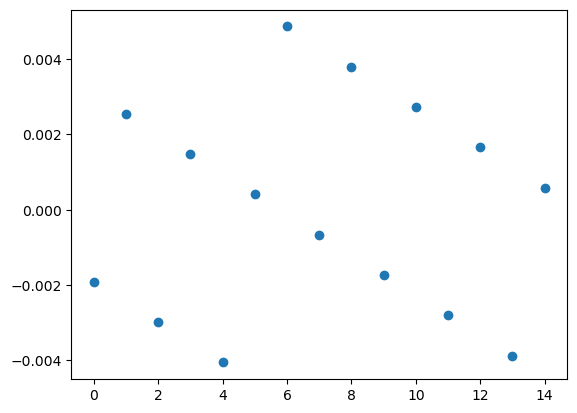

In [43]:
plt.plot(yerr, linestyle='none', marker = 'o')
plt.show()

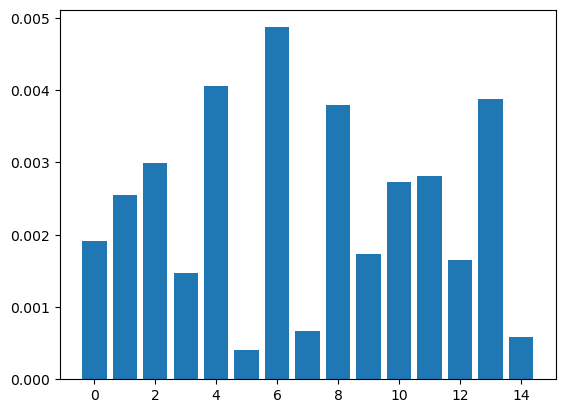

In [44]:
plt.bar(x, np.abs(yerr))
plt.show()

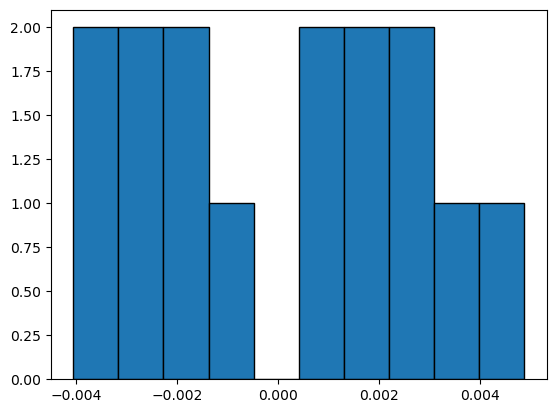

In [46]:
plt.hist(yerr, bins=10,edgecolor='black')
plt.show()